In [23]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [25]:
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
card_21 = pd.read_csv(DATA_PATH + 'card_21.csv', encoding="euc-kr")
card_22 = pd.read_csv(DATA_PATH + 'card_22.csv', encoding="euc-kr")
card_23 = pd.read_csv(DATA_PATH + 'card_23.csv', encoding="euc-kr")
customer_21 = pd.read_csv(DATA_PATH_2 + 'customer_21.csv', encoding="euc-kr")
customer_22 = pd.read_csv(DATA_PATH_2 + 'customer_22.csv', encoding="euc-kr")
customer_23 = pd.read_csv(DATA_PATH_2 + 'customer_23.csv', encoding="euc-kr")

In [26]:
customer_21.head()

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202112,9999998161,60대이상,여,일반등급,대구광역시,달서구,1400000,0,0,0,0,0
1,202112,9999997589,60대이상,남,일반등급,경상북도,경주시,0,10000000,500000,0,0,0
2,202112,9999991579,60대이상,여,일반등급,경상북도,성주군,0,30000000,0,0,0,0
3,202112,9999989448,60대이상,남,일반등급,대구광역시,달서구,400000,0,0,0,0,0
4,202112,9999988325,60대이상,남,일반등급,대구광역시,달서구,2700000,0,0,0,0,0


In [27]:
customer_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20835992 entries, 0 to 20835991
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int64 
 1   고객ID      int64 
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int64 
 8   수신_거치식예금  int64 
 9   수신_적립식예금  int64 
 10  수신_펀드     int64 
 11  수신_외화예금   int64 
 12  대출금액      int64 
dtypes: int64(8), object(5)
memory usage: 2.0+ GB


In [28]:
customer_21.describe()

,기준년월,고객ID,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
count,2.083599e+07,2.083599e+07,2.083599e+07,2.083599e+07,2.083599e+07,2.083599e+07,2.083599e+07,2.083599e+07
mean,2.021065e+05,6.446423e+09,3.496862e+06,1.676945e+06,8.317572e+05,1.796502e+05,4.771058e+04,2.074139e+06
std,3.450497e+00,2.046096e+09,8.563224e+06,8.275483e+06,3.849710e+06,2.377228e+06,1.274628e+06,9.742281e+06
min,2.021010e+05,2.800584e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021040e+05,4.674197e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.021070e+05,6.437867e+09,5.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.021100e+05,8.217942e+09,2.900000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.021120e+05,9.999998e+09,9.900000e+07,9.900000e+07,9.900000e+07,9.900000e+07,9.900000e+07,9.900000e+07


# EDA
## 상품별 상관관계

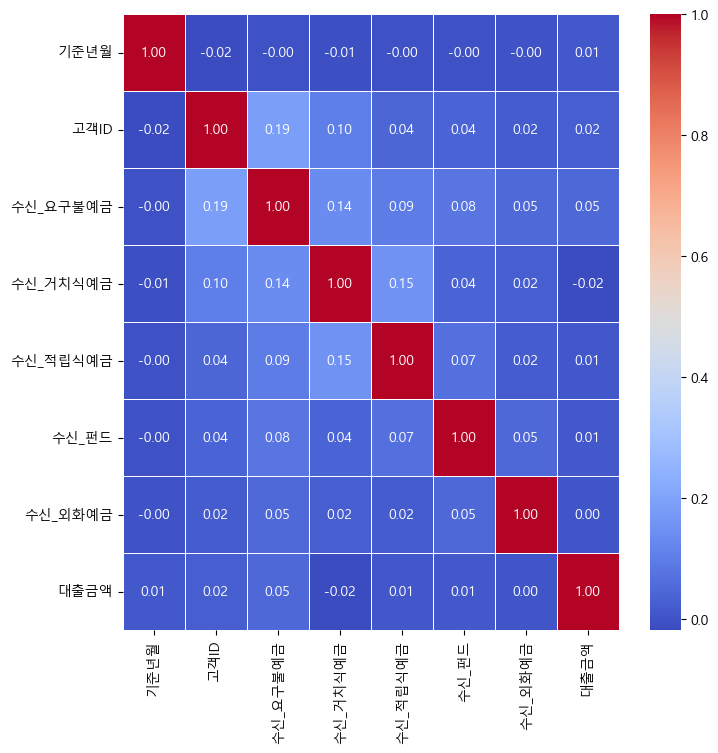

In [29]:
def plot_correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(8,8))
    numeric_df=df.select_dtypes(include=['int64', 'float64'])
    ax = sns.heatmap(data=numeric_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.show()

plot_correlation_heatmap(customer_21)

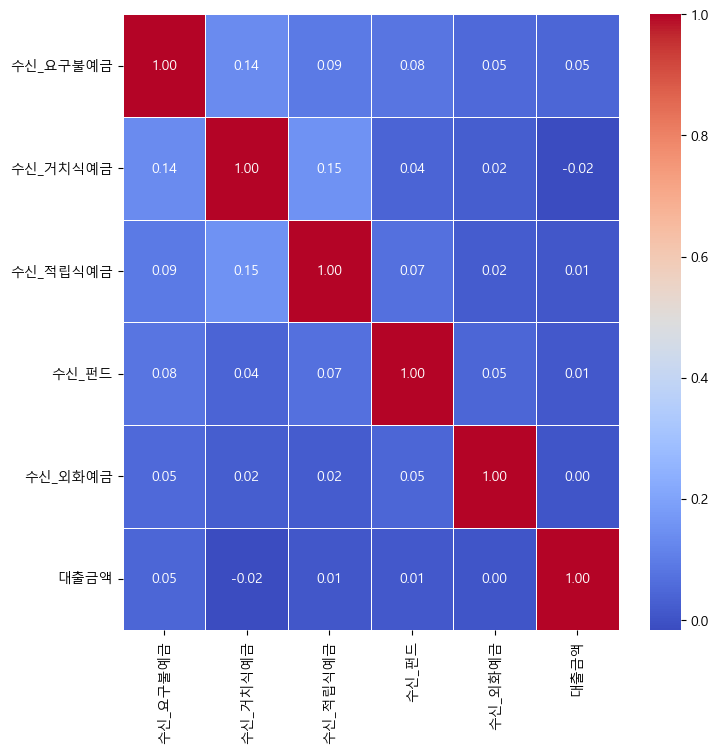

In [30]:
# 상관계수 heatmap 사용자 정의 함수 ver 2. 빼고 싶은 컬럼 은 빼고 그리자
def plot_correlation_heatmap(df, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(data=numeric_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm', ax=ax)
    plt.show()

plot_correlation_heatmap(customer_21, exclude_columns=['고객ID', '기준년월'])

- 상품 별 상관관계는 없다.

## 고객데이터
- 캐글 코드 재사용했음.

### 자택_시도 분포

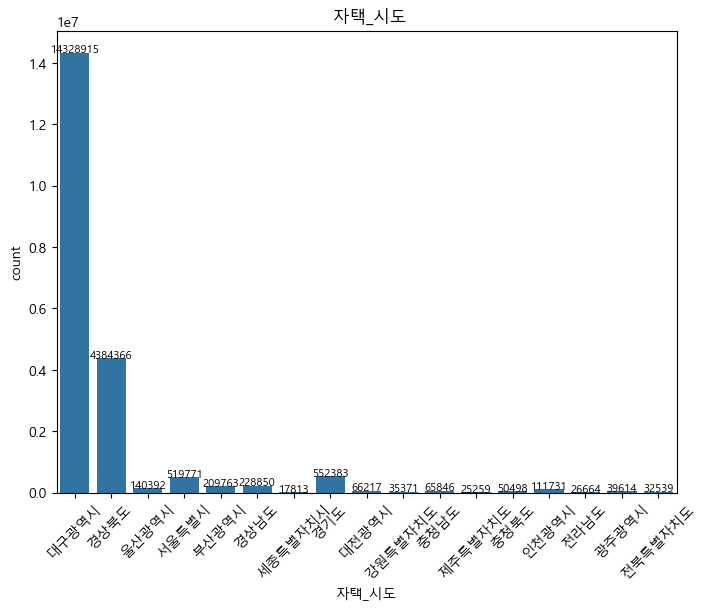

In [46]:
def eda_barplot_categorical_numeric(df, feature):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 6))
    ax = sns.countplot(data=df, x=feature)
    ax.set_title(f" {feature}")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  
            p.get_height() + 0.5,           
            int(p.get_height()),            
            ha='center',      
            fontsize=8    
        )
plt.show()

eda_barplot_categorical_numeric(customer_21, '자택_시도')

In [31]:
customer_21.head()

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202112,9999998161,60대이상,여,일반등급,대구광역시,달서구,1400000,0,0,0,0,0
1,202112,9999997589,60대이상,남,일반등급,경상북도,경주시,0,10000000,500000,0,0,0
2,202112,9999991579,60대이상,여,일반등급,경상북도,성주군,0,30000000,0,0,0,0
3,202112,9999989448,60대이상,남,일반등급,대구광역시,달서구,400000,0,0,0,0,0
4,202112,9999988325,60대이상,남,일반등급,대구광역시,달서구,2700000,0,0,0,0,0


### 고객 등급 분포

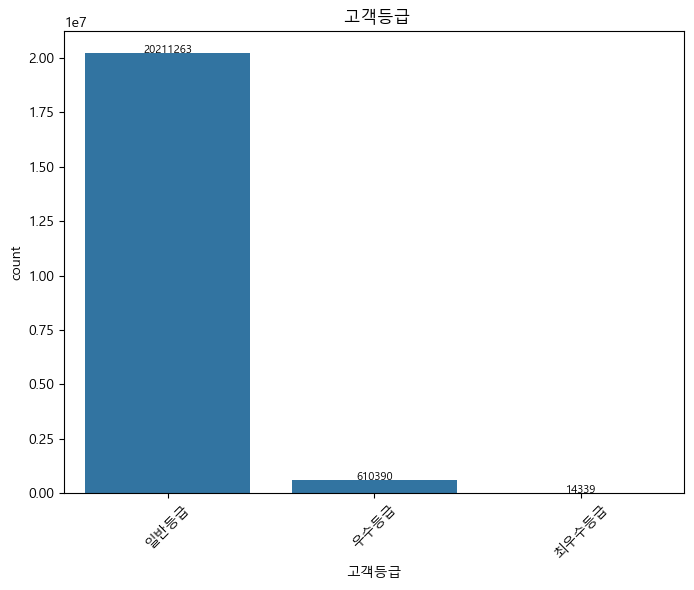

In [38]:
eda_barplot_categorical_numeric(customer_21, '고객등급')

### 성별 분포

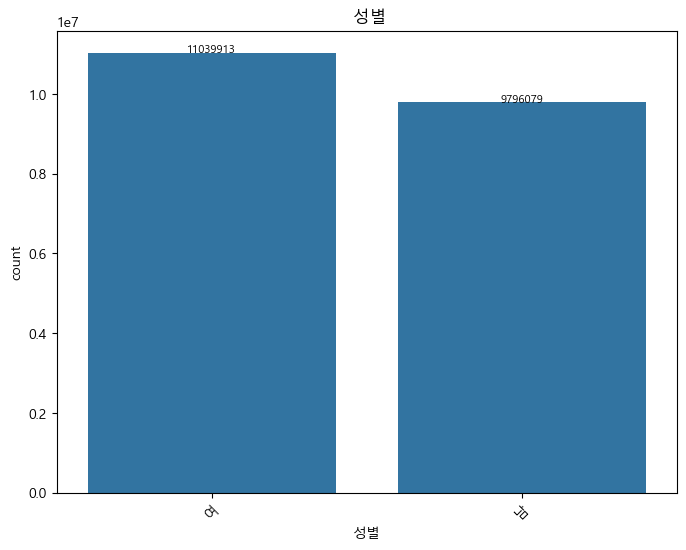

In [39]:
eda_barplot_categorical_numeric(customer_21, '성별')

### 연령대 분포

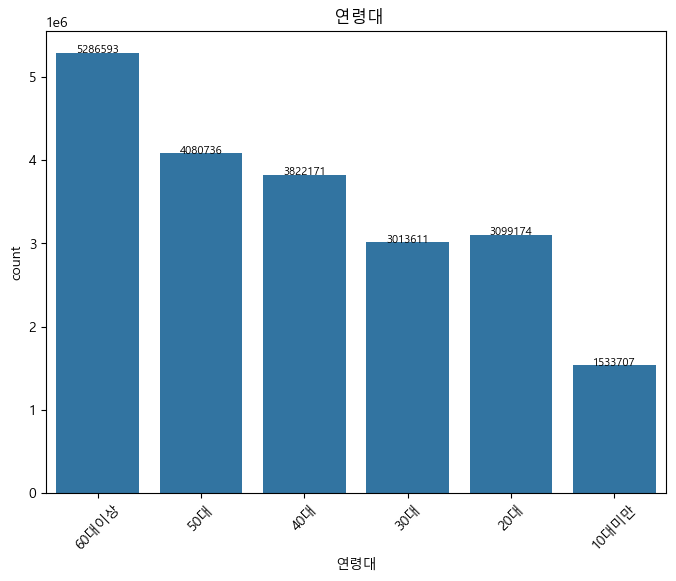

In [40]:
eda_barplot_categorical_numeric(customer_21, '연령대')

### box plot..?

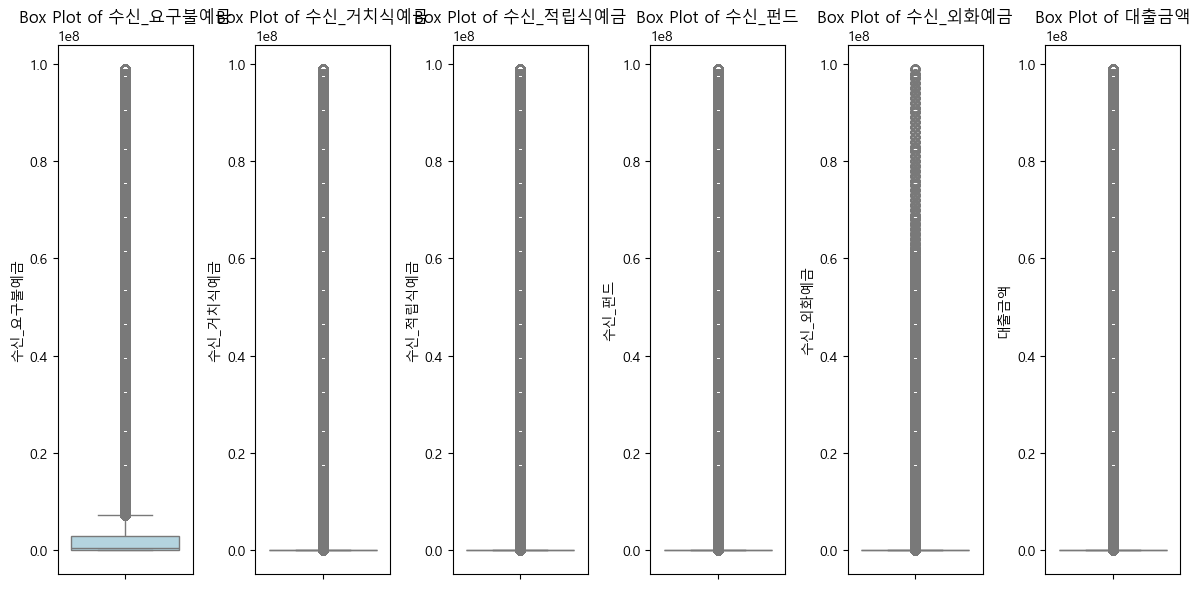

In [47]:
def plot_boxplots(df, columns):  # 여러 열에 대한 박스플롯 한 번에 생성
    fig, axes = plt.subplots(1, len(columns), figsize=(12, 6))  # fig와 axes를 생성
    
    # 하나의 열만 있을 경우 axes를 리스트로 만들기 위해 배열 처리
    if len(columns) == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], color='lightblue', ax=axes[i])  # 각 axes에 박스플롯 그리기
        axes[i].set_title(f'Box Plot of {col}')  # 각 서브플롯 제목 설정

    plt.tight_layout()  # 그래프가 겹치지 않도록 레이아웃 조정
    plt.show()


plot_boxplots(customer_21, ['수신_요구불예금'	,'수신_거치식예금',	'수신_적립식예금'	,'수신_펀드'	,'수신_외화예금',	'대출금액'])

### 연령대별

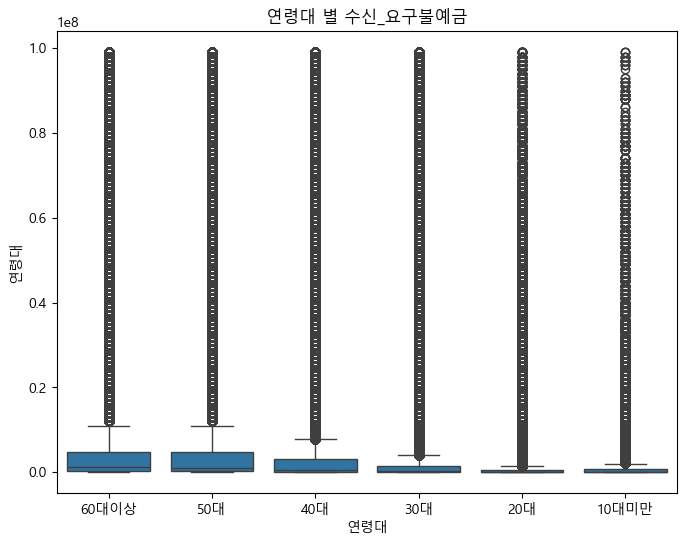

In [52]:
def plot_agegroup_balance_boxplot(df, age_column, balance_column):
    fig, axes = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(data=df, x=age_column, y=balance_column)
    ax.set_title(f"{age_column} 별 {balance_column}")
    ax.set_xlabel(f"{age_column}")
    ax.set_ylabel(f"{age_column}")
    plt.show()

plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_요구불예금')

In [51]:
customer_21['수신_요구불예금'].describe()

count    2.083599e+07
mean     3.496862e+06
std      8.563224e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+05
75%      2.900000e+06
max      9.900000e+07
Name: 수신_요구불예금, dtype: float64

In [57]:
customer_21['수신_요구불예금'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20835992 entries, 0 to 20835991
Series name: 수신_요구불예금
Non-Null Count     Dtype
--------------     -----
20835992 non-null  int64
dtypes: int64(1)
memory usage: 159.0 MB


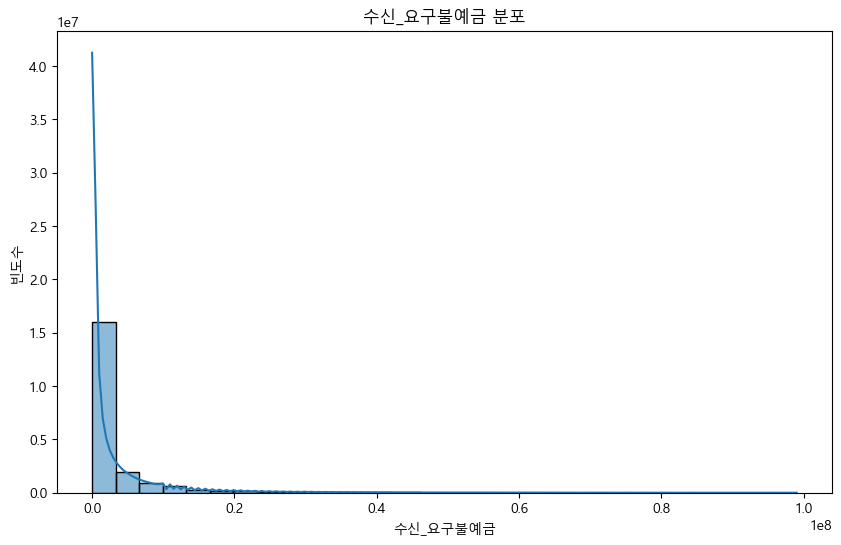

In [60]:
def plot_balance_distribution(df, balance_column):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.histplot(df[balance_column], bins=30, kde=True)  # 히스토그램과 KDE 커널 밀도 곡선 추가
    ax.set_title(f"{balance_column} 분포")
    ax.set_xlabel(f"{balance_column}")
    ax.set_ylabel("빈도수")
    plt.show()


plot_balance_distribution(customer_21, '수신_요구불예금')

In [63]:
# 사분위수 활용해서 이상치 개수 구하기
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_outliers = df[df[column] < (Q1 - 1.5 * IQR)]
    upper_outliers = df[df[column] > (Q3 + 1.5 * IQR)]
    outlier_count = lower_outliers.shape[0] + upper_outliers.shape[0]
    print(f"이상치 개수: {outlier_count}")
    return outlier_count


In [64]:
outlier_count = count_outliers(customer_21, '수신_요구불예금')

이상치 개수: 2654951


In [59]:
total = 20835992
a=20835992 - 2654951
outlier_ratio = a/total
print(f"이상치 비율: {outlier_ratio}")

이상치 비율: 0.8725786130077224


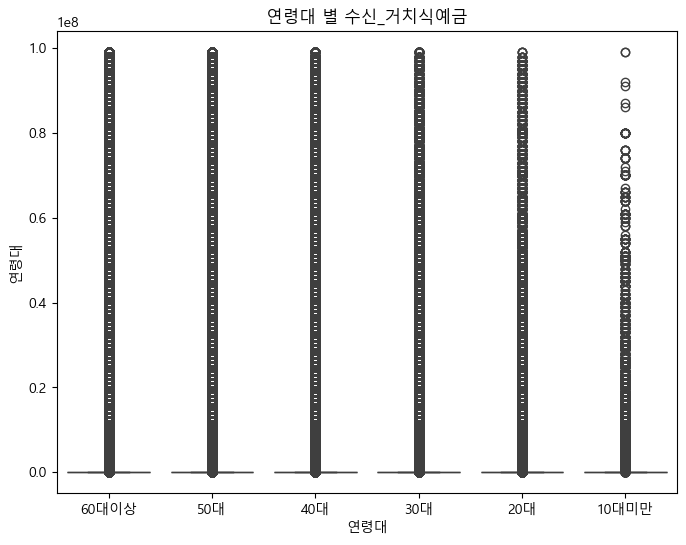

In [53]:
plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_거치식예금')

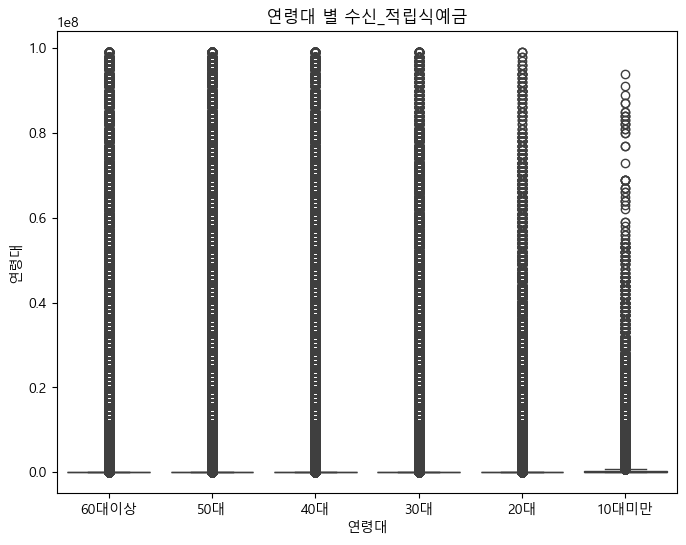

In [54]:
plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_적립식예금')

In [67]:
# plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_펀드')

In [ ]:
plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_외화예금')

In [ ]:
plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_대출잔액')

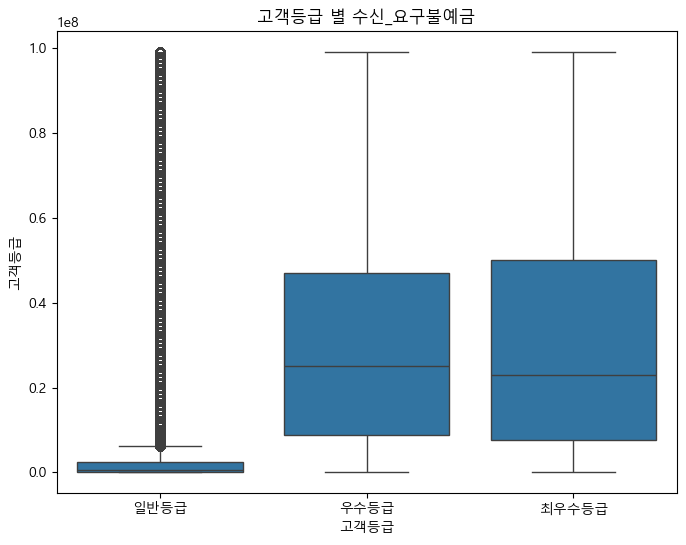

In [65]:
plot_agegroup_balance_boxplot(customer_21, '고객등급', '수신_요구불예금')

In [66]:
customer_21['고객등급'].value_counts()

고객등급
일반등급     20211263
우수등급       610390
최우수등급       14339
Name: count, dtype: int64

In [70]:
customer_21['고객등급']['일반등급']

'일반등급'

In [71]:
Q1 = customer_21['고객등급']['일반등급'].quantile(0.25)
Q3 = customer_21['고객등급']['일반등급'].quantile(0.75)
IQR = Q3 - Q1
IQR

KeyError: '일반등급'

In [ ]:
def plot_balance_distribution(df, balance_column):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.histplot(df[balance_column], bins=30, kde=True)  # 히스토그램과 KDE 커널 밀도 곡선 추가
    ax.set_title(f"{balance_column} 분포")
    ax.set_xlabel(f"{balance_column}")
    ax.set_ylabel("빈도수")
    plt.show()


plot_balance_distribution(customer_21, '수신_요구불예금')

In [75]:
customer_21['고객등급']


TypeError: Cannot index by location index with a non-integer key